In [1]:
# Climada damage assessment

# Assets: LitPop 1 1, Litpop 3 1, Litpop 2 1, Litpop 0 1 
# 1 Tropical cyclones in Philippines
# 1.1 Single Events: Strongest cyclones 2010 - 2020
# 1.2 Probabilistic Events (3 strongest typhoons)
# 1.3 Probabilistic Events 1990-2020 basin = NA, 5 synth. tracks
# 1.4 Probabilistic Events with Climate change impact
# 2 Surge with SLOSH


# 2.1 Probabilistic Events with Climate change impact
# 3 Surge with GeoClaw (validation)
# 4 River Flood
# 5 

import pandas as pd
import numpy as np
from climada import *
from climada.entity import *
from climada.hazard import *
from climada.entity import Exposures
from climada.hazard import Hazard
from climada.entity import Exposures, ImpactFuncSet
from climada.engine import Impact

2021-01-10 22:59:50,186 - climada - DEBUG - Loading default config file: /home/ma/Documents/geo/climada/conf/defaults.conf


/home/ma/anaconda3/envs/geo/lib/python3.7/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
# https://climada-python.readthedocs.io/en/stable/tutorial/1_main_climada.html#Adaptation-options-appraisal

wd               =      "/climada/"

exposure_litpop  =    wd + "LitPop/"         # done
surges_bathtub   =    wd + "SloshSurge/"     # input waiting from wenlan
surges_river     =    wd + "riversurge/"     # input waiting from wenlan -> could be moved to TIM

tropicalcyclone  =    wd + "TropicalCyclone/"# done



In [3]:
LP = "_LP11"       # Filename extension for the LitPop File to be used (11 would be Lit = 1 and Pop = 1)
year = "_y2020" # Filename extension for the reference year for climate change applied
track = "_tr3012" # track amount (in this case it will be 3012)
res = "_res_001" # resolution of the cells (centroid resolution)

In [ ]:
# Hazard Wind

haz2020wind = Hazard("TC")
haz2050wind.read_hdf5("PATH TO h5 FILE")
haz2050wind = Hazard("TC")
haz2020wind.read_hdf5("PATH TO h5 FILE")
haz2050wind = Hazard("TC")
haz2100wind.read_hdf5("PATH TO h5 FILE")


# Hazard Surge Slosh

haz2040surge = Hazard("TS")
haz2040surge.read_hdf5("PATH TO h5 FILE")
haz2080surge = Hazard("TS")
haz2080surge.read_hdf5("PATH TO h5 FILE")

# Hazard Surge River

haz2040surge = Hazard("TS")
haz2040surge.read_hdf5("PATH TO h5 FILE")
haz2080surge = Hazard("TS")
haz2080surge.read_hdf5("PATH TO h5 FILE")


In [ ]:
# Some statistics for the hazards

hazard = haz2020wind

#helping functions

def varse(a, axis=None):
    """ Variance of sparse matrix a
    var = mean(a**2) - mean(a)**2
    """
    a_squared = a.copy()
    a_squared.data **= 2
    return a_squared.mean(axis) - np.square(a.mean(axis))

def stds(a, axis=None):
    """ Standard deviation of sparse matrix a
    std = sqrt(var(a))
    """
    return np.sqrt(vars(a, axis))


#actual results

print("-----mean---------")
print(hazard.intensity[hazard.intensity>0].mean())
# print(haz2080surge.intensity[haz2100surge.intensity>0].mean())
print(hazard.intensity[hazard.intensity>0].mean())
# print(haz2040surge.intensity[haz2100surge.intensity>0].mean())
print(hazard.intensity[hazard.intensity>0].mean())
print("-----max---------")
print(hazard.intensity.max())
# print(haz2080surge.intensity.max())
print(hazard.intensity.max())
# print(haz2040surge.intensity.max())
print(hazard.intensity.max())
print("-----std---------")


#stds(hazard.intensity)

In [4]:
# Exposures 
# These are the LitPop h5 files to be read!

exp1_1 = Exposures()
# exp3_1 = Exposures()
# exp2_1 = Exposures()
# exp0_1 = Exposures()

exp1_1.read_hdf5(exposure_litpop + "LITPOP FILE.h5")
# exp3_1.read_hdf5(exposure_litpop + "LP_PHL_2020_3_1.h5")
# exp2_1.read_hdf5(exposure_litpop + "LP_PHL_2020_2_1.h5")
# exp0_1.read_hdf5(exposure_litpop + "LP_PHL_2020_0_1.h5")



# add column to exp1 to match the impact function - if_TC for Tropical cyclone wind and if_TS for storm surge
# for using another hazard type, please delete the previous "if_TC or if_TS" column and add the new one.

exp1_1["if_TS"] = np.ones(len(exp1_1))
# exp3_1["if_TS"] = np.ones(len(exp3_1))
# exp2_1["if_TS"] = np.ones(len(exp2_1))
# exp0_1["if_TS"] = np.ones(len(exp0_1))
                            
exp = exp1_1


2021-01-10 23:00:06,598 - climada.entity.exposures.base - INFO - Reading /media/ma/ext/climada/LitPop/LP_PHL_2020_1_1.h5


In [ ]:
# DATA PLOT

exp_p = exp.plot_raster()
exp_p.figure.savefig(outEAI + "_plot_ras" + year + LP + ".tif")
exp2 = exp.plot_hexbin(pop_name = False)
exp2.figure.savefig(outEAI + "_hexbin" + year + LP + ".tif")

In [5]:
# impact functions 


from climada.entity import ImpactFuncSet

imp_set = ImpactFuncSet()
imp_set.read_excel(imp)

In [7]:
# CHECK CONTENTS OF IMPACT FUNCTIONS

print(imp_set.get_hazard_types())
print(imp_set.get_ids())
print(imp_set.get_func(haz_type=None, fun_id=None))

['TS']
{'TS': [1]}
{'TS': {1: <climada.entity.impact_funcs.base.ImpactFunc object at 0x7f687b6e0890>}}


In [8]:
# CALCULATE IMPACT

imp = Impact()
imp.calc(exp, imp_set, haiyan2100, save_mat = True)

2021-01-10 23:02:19,823 - climada.entity.exposures.base - INFO - Matching 350901 exposures with 584001 centroids.
2021-01-10 23:03:05,490 - climada.util.interpolation - WARNING - Distance to closest centroid is greater than 100km for 248150 coordinates.
2021-01-10 23:03:05,495 - climada.engine.impact - INFO - Calculating damage for 100723 assets (>0) and 1 events.
if_TS


In [20]:
imp

In [ ]:
# plot strongest event and print the data

strong = WP_ens.plot_intensity(-1)
strong.figure.savefig(outEAI+ "strongest" +LP+ track+ year+".svg")
strong.figure.savefig(outEAI+ "strongest" +LP+ track+ year+".png")

In [ ]:
# impact exceedence curve for probabilistic events

imp_exc_curve = imp.calc_freq_curve()
imp_exc_curve.plot().figure.savefig(outEAI+"exce_freq_curve_PHL_" + LP + year + track+ "_eai.svg")
imp_exc_curve.plot().figure.savefig(outEAI+"exce_freq_curve_PHL_" + LP + year + track+ "_eai.png")

In [ ]:
# create CSV file for further potential analysis

impzip = zip(imp_exc_curve.impact,imp_exc_curve.return_per)
impzip = pd.DataFrame(imp_exc_curve.impact,imp_exc_curve.return_per)
impzip.to_csv(outEAI+"imp_exc_curve"+LP+year+track+".csv")

In [9]:
# save impact as csv and xlsx

imp.write_csv(outEAI+"impact"+LP+year+track+"_eai.csv")
imp.write_excel(outEAI+"impact"+LP+year+track+"_eai.xlsx")

2021-01-10 23:03:05,526 - climada.engine.impact - INFO - Writing /media/ma/ext/climada/Expected Annual Damage Output Files/surge/Haiyan_Models/impact_Haiyan_lp11_reef_alive_y2100_tr1_eai.csv
2021-01-10 23:03:06,558 - climada.engine.impact - INFO - Writing /media/ma/ext/climada/Expected Annual Damage Output Files/surge/Haiyan_Models/impact_Haiyan_lp11_reef_alive_y2100_tr1_eai.xlsx


In [10]:
# print key values (tot value damaged and annual average impact)

print(imp.tot_value)
print(imp.aai_agg)

104247044949.29533
303632818.0180367


In [11]:
txt = imp.calc_impact_year_set()
txt

{2015: 15181640900.901836}

In [ ]:

#plotting and also use set extent (can be left out !!)

p1 = imp.plot_raster_eai_exposure(save_tiff= outEAI + "eaiexposure"+LP+year+track+".tif") 
p1.set_title("Haiyan impact 2100 SLR 85 Reef Impact")
p1.set_extent([minlon5, maxlon5,minlat5, maxlat5])

p1.figure.savefig(outEAI + "eaiexposure"+LP+year+track+".svg")
p1.set_extent([minlon5, maxlon5,minlat5, maxlat5])
p1.figure.savefig(outEAI + "eaiexposure"+LP+year+track+".png")
p1.set_extent([minlon5, maxlon5,minlat5, maxlat5])

2021-01-10 23:04:01,494 - climada.util.coordinates - INFO - Setting geometry points.


/home/ma/anaconda3/envs/geo/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


2021-01-10 23:04:22,402 - climada.entity.exposures.base - INFO - Setting latitude and longitude attributes.


/home/ma/Documents/geo/climada/util/plot.py:314: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  fig.tight_layout()
/home/ma/anaconda3/envs/geo/lib/python3.7/site-packages/contextily/tile.py:268: FutureWarning: The url format using 'tileX', 'tileY', 'tileZ' as placeholders is deprecated. Please use '{x}', '{y}', '{z}' instead.
  FutureWarning,
/home/ma/anaconda3/envs/geo/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


2021-01-10 23:05:35,565 - climada.entity.exposures.base - INFO - Setting latitude and longitude attributes.


Text(0.5, 1.0, 'Haiyan impact 2100 SLR 85 Reef Impact')

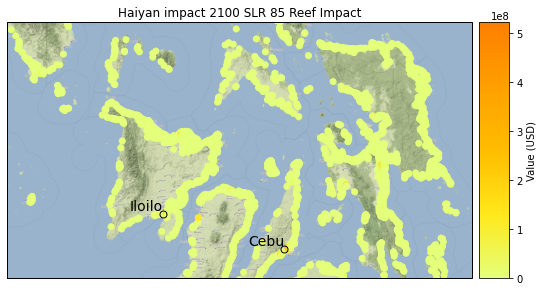

In [13]:
p2 = imp.plot_basemap_impact_exposure() 
p2.set_extent([minlon5, maxlon5,minlat5, maxlat5])
p2.set_title("Haiyan impact 2100 SLR 85 Reef Impact")
# p2.figure.savefig(outEAI + "plot_basemap_impact_exposure"+LP+year+track+".svg")
# p2.figure.savefig(outEAI + "plot_basemap_impact_exposure"+LP+year+track+".png")

/home/ma/Documents/geo/climada/util/plot.py:314: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  fig.tight_layout()
/home/ma/anaconda3/envs/geo/lib/python3.7/site-packages/cartopy/mpl/feature_artist.py:225: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  **dict(style))


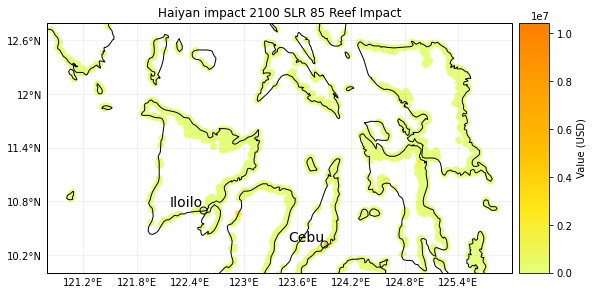

In [14]:
p3 = imp.plot_scatter_eai_exposure()
p3.set_extent([minlon5, maxlon5,minlat5, maxlat5])
p3.set_title("Haiyan impact 2100 SLR 85 Reef Impact")
p3.figure.savefig(outEAI + "scatter_eai_exposure"+LP+year+track+".png")
p3.figure.savefig(outEAI + "scatter_eai_exposure"+LP+year+track+".svg")

In [ ]:
# p4 = imp.plot_hexbin_eai_exposure(ignore_zero=True)
# p4.figure.savefig(outEAI + "hexbin_eai_exposure_nozero"+LP+year+track+".png")
# p4.figure.savefig(outEAI + "hexbin_eai_exposure_nozero"+LP+year+track+".svg")

In [ ]:
#imp.local_exceedance_imp()

In [ ]:
# p6 = imp.plot_hexbin_impact_exposure()
# p6.figure.savefig(outEAI + "hexbin_impact_exposure"+LP+year+track+".png")
# p6.figure.savefig(outEAI + "hexbin_impact_exposure"+LP+year+track+".svg")

In [ ]:
# imp.plot_rp_imp([10, 50, 75, 100])

In [ ]:
# from climada.engine import CostBenefit

# cost_ben = CostBenefit()
# cost_ben.calc(tc_fl, ent_fl, future_year=2060) # prints costs and benefits
# cost_ben.plot_cost_benefit() # plot cost benefit ratio and averted damage of every exposure
# cost_ben.plot_event_view() # plot averted damage of each measure for every return period